# Model Training with Class Weights

Class imbalance occurs when one class in the dataset significantly outweighs the other(s), which can lead to biased predictions in favor of the majority class. The **weighted method** addresses this issue by assigning different weights to each class during model training. 

#### Key Points for Weighted Method:
1. **Purpose**: 
   - To ensure that the model pays more attention to the minority class without altering the dataset.
   
2. **How it Works**:
   - Each class is given a weight inversely proportional to its frequency in the dataset.
   - The model incorporates these weights in its loss function to penalize misclassifications of the minority class more heavily.

3. **Benefits**:
   - Improves recall and precision for the minority class.
   - Reduces bias toward the majority class.

In this notebook, we train and evaluate various machine learning classification models to predict company bankruptcy using financial indicators. We address the highly imbalanced data using class wights.






## Steps:
1. Data loading and preparation of train and test sets
2. Creating multiple pipelines with standardiztion and 6 different machine learning algorithms (e.g. Logistic Regression, Random Forest, KNN, MLP)
3. Setting many different combinations of hyper-parameters for each machine learning algorithm
4. Using Grid Search with cross-validation to choose the best hyper-parameter combination for each machine learning algorithm
5. Train the best model for each machine learning algorithm on the whole training set and evaluate them on the test set
6. Comparison of model performance using metrics like balanced accuracy, recall, F1-score, precision, and ROC-AUC

In [1]:
# Import essential libraries for data analysis, visualization, and modeling

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Data Loading and Preparation

- Load the processed dataset for training.
- Separate the features and target variable.
- Split the data into training and testing sets.
- Standardize/scale the data as needed for certain models (e.g., Logistic Regression, SVM).

In [ ]:
# Load the dataset

file_path = '../data/processed/data.csv'
data = pd.read_csv(file_path)

data.shape

(6819, 79)

In [ ]:
# Separate features (X) and target variable (Y)
X = data.drop(columns=['Bankrupt?'])  # Drop the target column
y = data['Bankrupt?']  # Target column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [38]:
# Preprocessing the features

num_cols = X.select_dtypes(include=[float]).columns.to_list()

pipe_num = Pipeline([
    ('standardizer', StandardScaler())
])

prepoc = ColumnTransformer([
    ('num_transforms', pipe_num, num_cols)
], remainder='passthrough')
prepoc

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_transforms',
                                 Pipeline(steps=[('standardizer',
                                                  StandardScaler())]),
                                 ['ROA(C) before interest and depreciation '
                                  'before interest',
                                  'ROA(A) before interest and % after tax',
                                  'ROA(B) before interest and depreciation '
                                  'after tax',
                                  'Realized Sales Gross Margin',
                                  'Pre-tax net Interest Rate',
                                  'After-tax net Interest Rate',
                                  'Non-in...
                                  'Cash Flow Per Share',
                                  'Revenue Per Share (Yuan ¥)',
                                  'Operating Profit Per Share (Yuan ¥)',
                                  'Per Share Net profit before tax (Yuan ¥)',
                                  'Operating Profit Growth Rate',
                                  'After-tax Net Profit Growth Rate',
                                  'Regular Net Profit Growth Rate',
                                  'Continuous Net Profit Growth Rate',
                                  'Total Asset Growth Rate',
                                  'Net Value Growth Rate',
                                  'Total Asset Return Growth Rate Ratio',
                                  'Cash Reinvestment %', 'Quick Ratio', ...])])

In this section, we create a pipeline for each classification model to streamline preprocessing and model training. The following models will be evaluated:

 -  #### Logistic regression classifier
 - #### Support vector machine classifier
- #### Decision tree classifier
- #### Random forrest classifier
- #### K nearest neighbors classifier
- #### Multi-layer perceptron classifier

In [5]:
# Logistic regression classifier pipeline

pipe1 = Pipeline([
    ('preprocessing', prepoc),
    ('classifier', LogisticRegression())
])

pipe1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Operating Profit Per Share '
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('classifier', LogisticRegression())])

In [6]:
# Support vector machine classifier pipeline

pipe2 = Pipeline([
    ('preprocessing', prepoc),
    ('classifier', SVC())
])

pipe2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Revenue Per Share (Yuan ¥)',
                                                   'Operating Profit Per Share '
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('classifier', SVC())])

In [7]:
# Decision tree classifier pipeline

pipe3 = Pipeline([
    ('preprocessing', prepoc),
    ('classifier', DecisionTreeClassifier())
])

pipe3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Operating Profit Per Share '
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('classifier', DecisionTreeClassifier())])

In [8]:
# Random forrest classifier pipeline

pipe4 = Pipeline([
    ('preprocessing', prepoc),
    ('classifier', RandomForestClassifier())
])

pipe4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Operating Profit Per Share '
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('classifier', RandomForestClassifier())])

In [9]:
# K nearest neighbors classifier pipeline

pipe5 = Pipeline([
    ('preprocessing', prepoc),
    ('classifier', KNeighborsClassifier())
])

pipe5

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Operating Profit Per Share '
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('classifier', KNeighborsClassifier())])

In [10]:
# Multi-layer perceptron classifier pipeline

pipe6 = Pipeline([
    ('preprocessing', prepoc),
    ('classifier', MLPClassifier())
])

pipe6

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Operating Profit Per Share '
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('classifier', MLPClassifier())])

### Model Scoring Metrics and Hyperparameter Grids

In this section, we define:

1. **Scoring Metrics**:
   - Metrics to evaluate the performance of the models.
   - Metrics with probability-based scores, such as `neg_log_loss` and `roc_auc`.
   - Metrics without probability-based scores, such as `accuracy` and `f1`.

2. **Hyperparameter Grids**:
   - Parameter grids for each model to perform hyperparameter tuning using grid search with cross validation.
   - The most important hyperparameter is the class weight to address highly imbalanced data. Recall that the frequency of class 0 is 30 times more than the class 1.
   - Defined for:
     - Logistic Regression
     - Support Vector Machine
     - Decision Tree
     - Random Forest
     - K-Nearest Neighbors
     - Multi-Layer Perceptron

3. **Result Storage**:
   - A list, `best_test_scores`, is initialized to store the performance metrics of the best models for each classifier.
   
These definitions are crucial for automating model optimization and identifying the best-performing configurations during training.

It is worth mentioning that  the weight values in the hyperparameter grids (e.g., `{0:1, 1:10}`, `{0:1, 1:20}`, `{0:1, 1:30}`) were chosen based on the dataset's class imbalance, where the majority class (class 0) is approximately 30 times more frequent than the minority class (class 1). Moreover, the `"balanced"` option allows the system to automatically compute class weights inversely proportional to their frequencies, ensuring that the classes are balanced during training.



In [40]:
# Scoring metrics with probability
scoring_prob = ['neg_log_loss', 'roc_auc', 'accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']

# Scoring metrics without probability
scoring = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']

# Logistic regression classifier pipelines
log_param = {
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'classifier__class_weight': ['balanced', {0:1, 1:10}, {0:1, 1:20}, {0:1, 1:30}, None],
    'classifier__max_iter': [50, 100, 150],
    'classifier__random_state': [42]
    }

# Support vector machine classifier pipelines
svc_param = {
    'classifier__class_weight': ['balanced', {0:1, 1:10}, {0:1, 1:20}, {0:1, 1:30}, None],
    'classifier__max_iter': [10, 50, 100, -1],
    'classifier__random_state': [42]
    }

# Decision Tree classifier parameters
tree_param = {
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__class_weight': ['balanced', {0:1, 1:10}, {0:1, 1:20}, {0:1, 1:30}, None],
    'classifier__random_state': [42]
    }

# Random forrest classifier parameters
forrest_param = {
    'classifier__n_estimators': [100, 150],
    'classifier__criterion': ['gini'],
    'classifier__max_depth': [3, 5, 7],
    'classifier__class_weight': ['balanced', {0:1, 1:20}, None],
    'classifier__random_state': [42]
    }

# K nearest neighbors classifier parameters
knn_param = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance', None]
    }

# Multi-layer perceptron classifier parameters
mlp_param = {
    'classifier__hidden_layer_sizes': [(32,), (64,), (128,)],
    'classifier__alpha': [0.0001, 1, 100],
    'classifier__max_iter': [20, 50], # Numver of epoches
    'classifier__random_state': [42]
    }

best_test_scores = []

### Grid Search with Cross-Validation for Logistic Regression

In this section, we perform hyperparameter tuning for the Logistic Regression classifier using **GridSearchCV**. The steps are as follows:

1. **Pipeline**:
   - The model pipeline is defined earlier to handle preprocessing and classification.

2. **GridSearchCV**:
   - The hyperparameter grid (`log_param`) for Logistic Regression is used.
   - Cross-validation (`cv=5`) ensures robust evaluation by splitting the data into five folds.
   - Multiple scoring metrics are specified (`scoring_prob`), allowing us to evaluate model performance from different perspectives.

3. **Evaluation**:
   - Results are stored in a DataFrame for further analysis.
   - Key metrics include:
     - `balanced_accuracy`
     - `f1`
     - `recall`
     - `roc_auc`
     - `neg_log_loss`
   - The DataFrame is sorted by the `rank_test_balanced_accuracy` to highlight the best-performing model configuration.

This process ensures that the best hyperparameters for Logistic Regression are identified based on balanced accuracy while considering other metrics as well.

In [14]:
grid_cv1 = GridSearchCV(
    estimator=pipe1, 
    param_grid=log_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv1.fit(X_train, y_train)

res = grid_cv1.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
5,0.106939,"{'classifier__class_weight': 'balanced', 'clas...",0.846379,90,0.851966,1,0.857937,1,0.264606,84,0.156597,90,-0.402408,90,0.917609,7
11,0.199096,"{'classifier__class_weight': 'balanced', 'clas...",0.859028,88,0.847452,2,0.835079,2,0.276473,81,0.165862,87,-0.366205,62,0.915476,12
59,0.101225,"{'classifier__class_weight': {0: 1, 1: 30}, 'c...",0.858845,89,0.847357,3,0.835079,2,0.276311,82,0.165751,88,-0.370344,72,0.915859,10
4,0.095644,"{'classifier__class_weight': 'balanced', 'clas...",0.859212,87,0.844784,4,0.829365,4,0.275476,83,0.165343,89,-0.368690,64,0.915816,11
10,0.187125,"{'classifier__class_weight': 'balanced', 'clas...",0.866178,82,0.840255,5,0.812540,5,0.281609,52,0.170518,81,-0.350285,57,0.912566,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.260680,"{'classifier__class_weight': None, 'classifier...",0.967553,9,0.577095,86,0.159683,85,0.236168,86,0.478788,10,-0.107965,1,0.919714,5
89,0.292405,"{'classifier__class_weight': None, 'classifier...",0.968286,1,0.569107,87,0.142381,87,0.223299,87,0.536869,3,-0.111557,3,0.919580,6
76,0.094486,"{'classifier__class_weight': None, 'classifier...",0.968286,1,0.566344,88,0.136667,88,0.216401,88,0.538889,1,-0.115146,4,0.920293,2
83,0.196268,"{'classifier__class_weight': None, 'classifier...",0.968286,1,0.566344,88,0.136667,88,0.216401,88,0.538889,1,-0.115889,5,0.919967,3


In [15]:
grid_cv1.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_iter': 50,
 'classifier__random_state': 42,
 'classifier__solver': 'saga'}

### Evaluating the Best Logistic Regression Model on the Test Set

After identifying the best hyperparameters for Logistic Regression using **GridSearchCV**, we evaluate its performance on the test set. The steps are as follows:

1. **Best Estimator**:
   - Retrieve the best model (`best_estimator_`) based on the cross-validation results.

2. **Predictions**:
   - Use the best model to generate predictions (`y_pred_test`) and prediction probabilities (`y_proba_test`) for the test set.

3. **Performance Metrics**:
   - Evaluate the model on the test set using the following metrics:
     - **Accuracy**: Overall correctness of predictions.
     - **Balanced Accuracy**: Accounts for class imbalance by averaging recall for each class.
     - **Recall**: Measures the model's ability to identify the positive class correctly.
     - **F1-Score**: Harmonic mean of precision and recall.
     - **Precision**: Proportion of true positive predictions out of all positive predictions.
     - **Log Loss**: Measures the model's probability calibration.
     - **ROC-AUC**: Evaluates the model's ability to distinguish between classes at different thresholds.

4. **Result Storage**:
   - Append the performance metrics to `best_test_scores` for future comparison with other models.
   - Store detailed performance metrics in a dictionary (`performance_metrics`) for easy access and analysis.

This evaluation provides a comprehensive understanding of the model's effectiveness on unseen data.


In [43]:
model1 = grid_cv1.best_estimator_

y_pred_test = model1.predict(X_test)
y_proba_test = model1.predict_proba(X_test)

best_test_scores.append(['Logistic Regression', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.8563049853372434,
 'balanced_accuracy_score_test': 0.8488636363636364,
 'recall_score_test': 0.8409090909090909,
 'f1_score_test': 0.2740740740740741,
 'precision_score_test': 0.16371681415929204,
 'log_loss_test': 0.37907970884617076,
 'roc_auc_score_test': 0.8960227272727274}

### Grid Search with Cross-Validation for Support Vector Machine (SVM)

This section focuses on hyperparameter tuning for the Support Vector Machine (SVM) classifier using **GridSearchCV**. The process includes:

1. **Pipeline**:
   - The SVM classifier is integrated into a preprocessing pipeline (`pipe2`).

2. **GridSearchCV**:
   - The hyperparameter grid (`svc_param`) for SVM is used to find the optimal parameter combination.
   - Cross-validation (`cv=5`) splits the training data into five folds to ensure robust evaluation.
   - Multiple scoring metrics (`scoring`) are specified to evaluate performance across different aspects.

3. **Evaluation**:
   - Results from the cross-validation process are stored in a DataFrame for detailed analysis.
   - Metrics included in the evaluation:
     - `accuracy`
     - `balanced_accuracy`
     - `recall`
     - `f1`
     - `precision`
   - The DataFrame is sorted by `rank_test_balanced_accuracy` to identify the best-performing configuration.

This step ensures that the SVM model is optimized for balanced accuracy while considering other important metrics.


In [17]:
grid_cv2 = GridSearchCV(
    estimator=pipe2, 
    param_grid=svc_param, 
    scoring = scoring,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv2.fit(X_train, y_train)

res = grid_cv2.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision']].sort_values('rank_test_balanced_accuracy')

c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\li

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision
3,0.209320,"{'classifier__class_weight': 'balanced', 'clas...",0.896425,6,0.762357,1,0.619048,13,0.279743,4,0.180941,6
15,0.183430,"{'classifier__class_weight': {0: 1, 1: 30}, 'c...",0.910174,5,0.753124,2,0.585238,14,0.298146,3,0.200537,5
11,0.173749,"{'classifier__class_weight': {0: 1, 1: 20}, 'c...",0.918790,4,0.746685,3,0.562698,15,0.311735,2,0.216658,4
7,0.147765,"{'classifier__class_weight': {0: 1, 1: 10}, 'c...",0.942255,3,0.725897,4,0.494603,17,0.356589,1,0.282374,2
17,0.019057,"{'classifier__class_weight': None, 'classifier...",0.806783,7,0.672077,5,0.528095,16,0.172186,6,0.108166,7
18,0.033812,"{'classifier__class_weight': None, 'classifier...",0.944088,2,0.611297,6,0.255556,19,0.219630,5,0.236765,3
16,0.011691,"{'classifier__class_weight': None, 'classifier...",0.773052,8,0.599643,7,0.414286,18,0.113010,7,0.066267,8
19,0.100493,"{'classifier__class_weight': None, 'classifier...",0.967736,1,0.508208,8,0.016984,20,0.032164,20,0.366667,1
12,0.010716,"{'classifier__class_weight': {0: 1, 1: 30}, 'c...",0.032264,16,0.500000,9,1.000000,1,0.062511,8,0.032264,9
0,0.014222,"{'classifier__class_weight': 'balanced', 'clas...",0.032264,16,0.500000,9,1.000000,1,0.062511,8,0.032264,9


In [18]:
grid_cv2.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_iter': -1,
 'classifier__random_state': 42}

### Evaluating the Best Support Vector Machine (SVM) Model on the Test Set

After performing hyperparameter tuning for the Support Vector Machine (SVM) classifier, we evaluate the best model on the test set. The process includes:

1. **Best Estimator**:
   - Retrieve the best SVM model (`best_estimator_`) identified through GridSearchCV.

2. **Predictions**:
   - Use the best model to generate predictions (`y_pred_test`) for the test set.

3. **Performance Metrics**:
   - Evaluate the SVM model's performance on the test set using the following metrics:
     - **Accuracy**
     - **Balanced Accuracy**
     - **Recall**
     - **F1-Score**
     - **Precision**
   - Since SVM does not directly provide probability estimates in this implementation, metrics like `log_loss` and `roc_auc` are marked as `'NA'`.

4. **Result Storage**:
   - Append the evaluation results to `best_test_scores` for later comparison with other models.
   - Store detailed test set performance metrics in a dictionary (`performance_metrics`) for further analysis.

This evaluation ensures a clear understanding of the SVM model's performance on unseen data.


In [44]:
model2 = grid_cv2.best_estimator_

y_pred_test = model2.predict(X_test)

best_test_scores.append(['SVC', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), 'NA', 'NA'])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
}
performance_metrics

{'accuracy_score_test': 0.8944281524926686,
 'balanced_accuracy_score_test': 0.7696969696969698,
 'recall_score_test': 0.6363636363636364,
 'f1_score_test': 0.28,
 'precision_score_test': 0.1794871794871795}

### Grid Search with Cross-Validation for Decision Tree Classifier

This section performs hyperparameter tuning for the Decision Tree classifier using **GridSearchCV**. The model is evaluated using multiple scoring metrics (`scoring_prob`) with cross-validation (`cv=5`). Results are stored and sorted by `rank_test_balanced_accuracy` to identify the best-performing configuration.


In [20]:
grid_cv3 = GridSearchCV(
    estimator=pipe3, 
    param_grid=tree_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv3.fit(X_train, y_train)

res = grid_cv3.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
36,0.078239,"{'classifier__class_weight': {0: 1, 1: 30}, 'c...",0.856095,59,0.832280,1,0.806825,1,0.269494,35,0.162788,57,-0.409087,17,0.849984,14
0,0.078586,"{'classifier__class_weight': 'balanced', 'clas...",0.855545,60,0.831996,2,0.806825,1,0.268476,38,0.161982,58,-0.410636,18,0.849518,15
24,0.074488,"{'classifier__class_weight': {0: 1, 1: 20}, 'c...",0.889459,44,0.830580,3,0.767619,7,0.311878,11,0.196307,43,-0.290472,7,0.903510,1
44,0.093422,"{'classifier__class_weight': {0: 1, 1: 30}, 'c...",0.865811,51,0.826572,4,0.784603,3,0.279271,29,0.171079,49,-0.398128,15,0.884437,8
40,0.095623,"{'classifier__class_weight': {0: 1, 1: 30}, 'c...",0.865811,51,0.826572,4,0.784603,3,0.279271,29,0.171079,49,-0.398128,15,0.884437,8
4,0.091613,"{'classifier__class_weight': 'balanced', 'clas...",0.865811,51,0.826572,4,0.784603,3,0.279271,29,0.171079,49,-0.398099,13,0.884437,8
8,0.095018,"{'classifier__class_weight': 'balanced', 'clas...",0.865811,51,0.826572,4,0.784603,3,0.279271,29,0.171079,49,-0.398099,13,0.884437,8
12,0.073586,"{'classifier__class_weight': {0: 1, 1: 10}, 'c...",0.921173,38,0.825026,8,0.722222,10,0.370576,1,0.250891,25,-0.219138,4,0.861992,12
32,0.085854,"{'classifier__class_weight': {0: 1, 1: 20}, 'c...",0.888543,45,0.821740,9,0.750317,8,0.305073,14,0.191964,45,-0.323894,9,0.886474,4
28,0.089175,"{'classifier__class_weight': {0: 1, 1: 20}, 'c...",0.888543,45,0.821740,9,0.750317,8,0.305073,14,0.191964,45,-0.323894,9,0.886474,4


In [21]:
grid_cv3.best_params_

{'classifier__class_weight': {0: 1, 1: 30},
 'classifier__criterion': 'gini',
 'classifier__max_depth': 3,
 'classifier__random_state': 42}

### Evaluating the Best Decision Tree Model on the Test Set

The best Decision Tree model from GridSearchCV is evaluated on the test set. Key metrics such as accuracy, balanced accuracy, recall, F1-score, precision, log loss, and ROC-AUC are calculated and stored for comparison with other models.


In [45]:
model3 = grid_cv3.best_estimator_

y_pred_test = model3.predict(X_test)
y_proba_test = model3.predict_proba(X_test)

best_test_scores.append(['Decision Tree', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.8585043988269795,
 'balanced_accuracy_score_test': 0.8500000000000001,
 'recall_score_test': 0.8409090909090909,
 'f1_score_test': 0.27715355805243447,
 'precision_score_test': 0.16591928251121077,
 'log_loss_test': 0.32656992895149656,
 'roc_auc_score_test': 0.921651170798898}

### Grid Search with Cross-Validation for Random Forest Classifier

This section uses **GridSearchCV** to tune hyperparameters for the Random Forest classifier. The model is evaluated using multiple scoring metrics (`scoring_prob`) with cross-validation (`cv=5`). Results are sorted by `rank_test_balanced_accuracy` to find the best configuration.


In [23]:
grid_cv4 = GridSearchCV(
    estimator=pipe4, 
    param_grid=forrest_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv4.fit(X_train, y_train)

res = grid_cv4.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
0,0.566338,"{'classifier__class_weight': 'balanced', 'clas...",0.891659,17,0.858785,1,0.823651,1,0.328949,11,0.205676,17,-0.272244,17,0.931830,11
1,0.864956,"{'classifier__class_weight': 'balanced', 'clas...",0.890742,18,0.855550,2,0.817937,2,0.325501,12,0.203397,18,-0.272701,18,0.931990,10
6,0.552446,"{'classifier__class_weight': {0: 1, 1: 20}, 'c...",0.917324,16,0.850105,3,0.778254,3,0.377655,8,0.249896,15,-0.224798,15,0.933045,6
7,0.820746,"{'classifier__class_weight': {0: 1, 1: 20}, 'c...",0.917507,15,0.847438,4,0.772540,4,0.376004,10,0.249154,16,-0.225897,16,0.932327,9
2,0.783057,"{'classifier__class_weight': 'balanced', 'clas...",0.928689,13,0.814859,5,0.693175,5,0.384955,7,0.268139,13,-0.180219,14,0.931755,12
3,1.180540,"{'classifier__class_weight': 'balanced', 'clas...",0.927223,14,0.811338,6,0.687460,6,0.377297,9,0.261128,14,-0.179583,13,0.931408,14
8,0.775893,"{'classifier__class_weight': {0: 1, 1: 20}, 'c...",0.938588,11,0.803479,7,0.659048,7,0.410081,5,0.300863,11,-0.156886,12,0.931497,13
9,1.164057,"{'classifier__class_weight': {0: 1, 1: 20}, 'c...",0.938588,11,0.803478,8,0.659048,7,0.409723,6,0.300103,12,-0.156105,11,0.933034,7
5,1.281484,"{'classifier__class_weight': 'balanced', 'clas...",0.946838,9,0.772226,9,0.585556,10,0.415638,3,0.327504,9,-0.134188,9,0.933765,5
4,0.862205,"{'classifier__class_weight': 'balanced', 'clas...",0.946104,10,0.771847,10,0.585556,9,0.412753,4,0.322915,10,-0.134915,10,0.932899,8


In [24]:
grid_cv4.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'gini',
 'classifier__max_depth': 3,
 'classifier__n_estimators': 100,
 'classifier__random_state': 42}

### Evaluating the Best Random Forest Model on the Test Set

The best Random Forest model from GridSearchCV is evaluated on the test set. Metrics such as accuracy, balanced accuracy, recall, F1-score, precision, log loss, and ROC-AUC are computed and stored for model comparison.


In [46]:
model4 = grid_cv4.best_estimator_

y_pred_test = model4.predict(X_test)
y_proba_test = model4.predict_proba(X_test)

best_test_scores.append(['Random Forrest', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.8944281524926686,
 'balanced_accuracy_score_test': 0.8575757575757577,
 'recall_score_test': 0.8181818181818182,
 'f1_score_test': 0.3333333333333333,
 'precision_score_test': 0.20930232558139536,
 'log_loss_test': 0.2792949390008077,
 'roc_auc_score_test': 0.9316976584022039}

### Grid Search with Cross-Validation for K-Nearest Neighbors (KNN) Classifier

This section performs hyperparameter tuning for the KNN classifier using **GridSearchCV**. Multiple scoring metrics (`scoring_prob`) are evaluated with cross-validation (`cv=5`), and results are sorted by `rank_test_balanced_accuracy` to identify the best configuration.


In [26]:
grid_cv5 = GridSearchCV(
    estimator=pipe5, 
    param_grid= knn_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv5.fit(X_train, y_train)

res = grid_cv5.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
0,0.013283,"{'classifier__n_neighbors': 3, 'classifier__we...",0.968469,7,0.594143,1,0.193968,1,0.277873,1,0.522930,7,-0.664474,8,0.712767,8
1,0.012428,"{'classifier__n_neighbors': 3, 'classifier__we...",0.968469,7,0.594143,1,0.193968,1,0.277873,1,0.522930,7,-0.664400,7,0.713186,7
2,0.012794,"{'classifier__n_neighbors': 3, 'classifier__we...",0.968469,7,0.594143,1,0.193968,1,0.277873,1,0.522930,7,-0.664474,8,0.712767,8
3,0.012258,"{'classifier__n_neighbors': 5, 'classifier__we...",0.969386,1,0.572517,4,0.148254,4,0.230645,4,0.594048,4,-0.535443,5,0.754993,5
4,0.010124,"{'classifier__n_neighbors': 5, 'classifier__we...",0.969386,1,0.572517,4,0.148254,4,0.230645,4,0.594048,4,-0.535058,4,0.757102,4
5,0.015046,"{'classifier__n_neighbors': 5, 'classifier__we...",0.969386,1,0.572517,4,0.148254,4,0.230645,4,0.594048,4,-0.535443,5,0.754993,5
6,0.011244,"{'classifier__n_neighbors': 7, 'classifier__we...",0.969019,4,0.561357,7,0.125556,7,0.202111,7,0.622619,1,-0.505818,2,0.763039,2
7,0.015044,"{'classifier__n_neighbors': 7, 'classifier__we...",0.969019,4,0.561357,7,0.125556,7,0.202111,7,0.622619,1,-0.505353,1,0.765678,1
8,0.015577,"{'classifier__n_neighbors': 7, 'classifier__we...",0.969019,4,0.561357,7,0.125556,7,0.202111,7,0.622619,1,-0.505818,2,0.763039,2


In [27]:
grid_cv5.best_params_

{'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}

### Evaluating the Best K-Nearest Neighbors (KNN) Model on the Test Set

The best KNN model from GridSearchCV is evaluated on the test set. Metrics such as accuracy, balanced accuracy, recall, F1-score, precision, log loss, and ROC-AUC are calculated and recorded for comparison.


In [47]:
model5 = grid_cv5.best_estimator_

y_pred_test = model5.predict(X_test)
y_proba_test = model5.predict_proba(X_test)

best_test_scores.append(['KNN', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.9640762463343109,
 'balanced_accuracy_score_test': 0.5420454545454545,
 'recall_score_test': 0.09090909090909091,
 'f1_score_test': 0.14035087719298245,
 'precision_score_test': 0.3076923076923077,
 'log_loss_test': 0.5738542831039023,
 'roc_auc_score_test': 0.7546487603305786}

### Grid Search with Cross-Validation for Multi-Layer Perceptron (MLP) Classifier

This section performs hyperparameter tuning for the MLP classifier using **GridSearchCV**. Multiple scoring metrics (`scoring_prob`) are evaluated with cross-validation (`cv=5`), and results are sorted by `rank_test_balanced_accuracy` to determine the best configuration.


In [42]:
grid_cv6 = GridSearchCV(
    estimator=pipe6, 
    param_grid= mlp_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv6.fit(X_train, y_train)

res = grid_cv6.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warning

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
3,0.584199,"{'classifier__alpha': 0.0001, 'classifier__hid...",0.966819,16,0.612310,1,0.233333,1,0.300296,2,0.461911,11,-0.124088,8,0.880799,14
9,0.560026,"{'classifier__alpha': 1, 'classifier__hidden_l...",0.969019,1,0.605318,2,0.216508,2,0.303715,1,0.533248,3,-0.104262,1,0.909495,7
5,0.782659,"{'classifier__alpha': 0.0001, 'classifier__hid...",0.967369,15,0.590733,3,0.188095,3,0.259762,3,0.457681,12,-0.128974,11,0.880464,15
2,0.245666,"{'classifier__alpha': 0.0001, 'classifier__hid...",0.967736,8,0.585397,4,0.176667,4,0.254952,4,0.491783,8,-0.117426,7,0.881397,13
1,0.487401,"{'classifier__alpha': 0.0001, 'classifier__hid...",0.966269,18,0.576193,5,0.159206,5,0.232854,5,0.466768,10,-0.126477,10,0.878629,16
4,0.310603,"{'classifier__alpha': 0.0001, 'classifier__hid...",0.967736,8,0.574347,6,0.153810,6,0.232548,6,0.496843,6,-0.116747,6,0.887686,12
0,0.201125,"{'classifier__alpha': 0.0001, 'classifier__hid...",0.966636,17,0.570937,7,0.147937,7,0.222690,7,0.467535,9,-0.133360,12,0.864871,18
11,0.744454,"{'classifier__alpha': 1, 'classifier__hidden_l...",0.969019,1,0.566723,8,0.136667,8,0.218162,8,0.580220,1,-0.105180,2,0.905832,8
7,0.494590,"{'classifier__alpha': 1, 'classifier__hidden_l...",0.967553,14,0.563124,9,0.130794,9,0.206652,9,0.500556,5,-0.109759,3,0.897769,9
10,0.341163,"{'classifier__alpha': 1, 'classifier__hidden_l...",0.968653,3,0.561009,10,0.125238,10,0.203665,10,0.555952,2,-0.110117,4,0.895534,10


In [30]:
grid_cv6.best_params_

{'classifier__hidden_layer_sizes': (64,),
 'classifier__max_iter': 100,
 'classifier__random_state': 42}

### Evaluating the Best Multi-Layer Perceptron (MLP) Model on the Test Set

The best MLP model from GridSearchCV is evaluated on the test set. Metrics such as accuracy, balanced accuracy, recall, F1-score, precision, log loss, and ROC-AUC are computed and stored for comparison.


In [48]:
model6 = grid_cv6.best_estimator_

y_pred_test = model6.predict(X_test)
y_proba_test = model6.predict_proba(X_test)

best_test_scores.append(['MLP', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.9640762463343109,
 'balanced_accuracy_score_test': 0.5750000000000001,
 'recall_score_test': 0.1590909090909091,
 'f1_score_test': 0.2222222222222222,
 'precision_score_test': 0.3684210526315789,
 'log_loss_test': 0.15908410984134144,
 'roc_auc_score_test': 0.8609159779614325}

### Comparing Model Performance on the Test Set

This section summarizes and compares the performance of all trained models on the test set. The metrics evaluated include accuracy, balanced accuracy, recall, F1-score, precision, log loss, and ROC-AUC. The results are presented in a DataFrame, sorted by `balanced accuracy(test)` in descending order.


In [49]:
pd.DataFrame(best_test_scores,
             columns = ['pipleline', 'accuracy(test)', 'balanced accuracy(test)', 'recall(test)', 'f1(test)',
                        'precision(test)', 'log loss(test)', 'roc auc(test)']).sort_values('balanced accuracy(test)',ascending = False)

,pipleline,accuracy(test),balanced accuracy(test),recall(test),f1(test),precision(test),log loss(test),roc auc(test)
3,Random Forrest,0.894428,0.857576,0.818182,0.333333,0.209302,0.279295,0.931698
2,Decision Tree,0.858504,0.850000,0.840909,0.277154,0.165919,0.32657,0.921651
0,Logistic Regression,0.856305,0.848864,0.840909,0.274074,0.163717,0.37908,0.896023
1,SVC,0.894428,0.769697,0.636364,0.280000,0.179487,NA,NA
5,MLP,0.964076,0.575000,0.159091,0.222222,0.368421,0.159084,0.860916
4,KNN,0.964076,0.542045,0.090909,0.140351,0.307692,0.573854,0.754649


### Model Performance Comparison: Explanation

From the table above, we can analyze the performance of each model based on the metrics evaluated:

1. **Random Forest**:
   - Achieved the best **balanced accuracy (0.8576)** and a high **ROC-AUC (0.9317)**.
   - Shows strong recall, indicating its effectiveness in identifying the minority class.

2. **Decision Tree**:
   - Balanced accuracy is comparable to Random Forest (0.8500), but F1 and precision are lower, suggesting weaker handling of class imbalance.

3. **Logistic Regression**:
   - Balanced accuracy (0.8489) and ROC-AUC (0.8960) are competitive, making it a good baseline model for this problem.

4. **Support Vector Classifier (SVC)**:
   - High accuracy (0.8944) but significantly lower balanced accuracy (0.7697), indicating it struggles with class imbalance.

5. **Multi-Layer Perceptron (MLP)**:
   - Achieves the highest accuracy (0.9641) but poor balanced accuracy (0.5750) and recall, indicating overfitting to the majority class.

6. **K-Nearest Neighbors (KNN)**:
   - Similar to MLP, achieves high accuracy (0.9641) but low balanced accuracy (0.5420) and recall, making it unsuitable for imbalanced datasets.

### Key Takeaways:
- **Random Forest** is the best-performing model overall, excelling in both balanced accuracy and ROC-AUC, making it the most suitable for this problem.
- Models like MLP and KNN perform well in terms of accuracy but fail to address class imbalance effectively, as seen in their low balanced accuracy and recall.
- Logistic Regression provides a good balance of performance across metrics and serves as a reliable baseline model.


### Feature Importance for the Best Model

In this section, we examine the feature importances for the best-performing model, **Random Forest**, trained with class weight. Feature importance helps identify which financial indicators contribute most to the model's predictions. The results are organized into a DataFrame for easier visualization, sorted by importance in descending order.


In [ ]:
# Best model feature Importance

feature_importances = model4['classifier'].feature_importances_
feature_names = X_train.columns 

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
33,Borrowing dependency,0.101279
16,Persistent EPS in the Last Four Seasons,0.078722
32,Net worth/Assets,0.067220
57,Retained Earnings to Total Assets,0.060504
7,Continuous interest rate (after tax),0.052944
...,...,...
50,Cash/Current Liability,0.000000
29,Quick Ratio,0.000000
56,Long-term Liability to Current Assets,0.000000
31,Total debt/Total net worth,0.000000


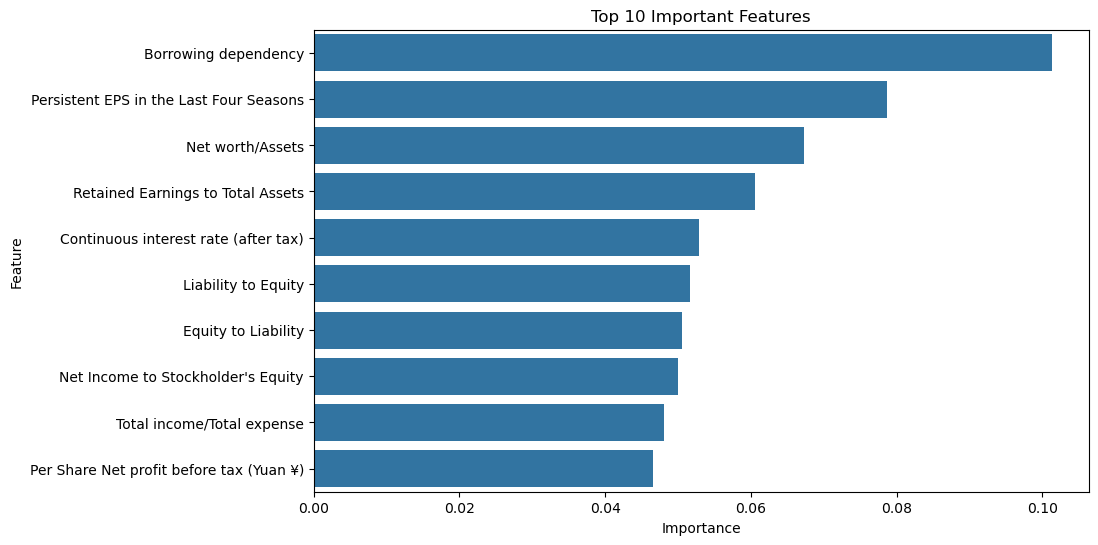

In [51]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()